In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Loading and cleaning of data**

In [23]:
df = pd.read_csv('house_prices_subset_IrinaCruceru.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Foundation    1168 non-null   object
 1   BsmtQual      1140 non-null   object
 2   BsmtCond      1140 non-null   object
 3   BsmtExposure  1140 non-null   object
 4   BsmtFinType1  1140 non-null   object
 5   BsmtFinSF1    1168 non-null   int64 
 6   BsmtFinType2  1140 non-null   object
 7   BsmtFinSF2    1168 non-null   int64 
 8   BsmtUnfSF     1168 non-null   int64 
 9   TotalBsmtSF   1168 non-null   int64 
 10  Heating       1168 non-null   object
 11  HeatingQC     1168 non-null   object
 12  CentralAir    1168 non-null   object
 13  Electrical    1167 non-null   object
 14  1stFlrSF      1168 non-null   int64 
 15  2ndFlrSF      1168 non-null   int64 
 16  LowQualFinSF  1168 non-null   int64 
 17  GrLivArea     1168 non-null   int64 
 18  SalePrice     1168 non-null   int64 
dtypes: int

In [25]:
df.head()

,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,SalePrice
0,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,145000
1,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,178000
2,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,85000
3,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,175000
4,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,127000


In [26]:
df.describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,446.023973,45.152397,570.595034,1061.771404,1169.354452,352.351027,5.696062,1527.401541,181441.541952
std,459.070977,158.217499,446.364551,440.676330,386.675268,439.570872,47.887106,524.432686,77263.583862
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,34900.000000
25%,0.000000,0.000000,222.500000,796.000000,888.000000,0.000000,0.000000,1145.750000,130000.000000
50%,384.500000,0.000000,480.000000,997.500000,1095.000000,0.000000,0.000000,1473.000000,165000.000000
75%,721.000000,0.000000,810.250000,1299.250000,1396.750000,728.000000,0.000000,1792.000000,214925.000000
max,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,745000.000000


In [27]:
df.isnull().sum().sort_values(ascending=False)

,0
BsmtQual,28
BsmtCond,28
BsmtExposure,28
BsmtFinType2,28
BsmtFinType1,28
Electrical,1
Foundation,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0


28/1168 values missing on the following columns:
* BsmtQual
* BsmtCond
* BsmtExposure
* BsmtFinType2
* BsmtFinType1

And 1 missing value in Electrical.
Not enough values to drop columns, will fill in with average/mode.

In [28]:
df.fillna(df.mean(numeric_only=True), inplace=True)

for col in df.select_dtypes('object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-3652477368.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [29]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", list(numeric_cols))
print("Categorical columns:", list(categorical_cols))

Numeric columns: ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'SalePrice']
Categorical columns: ['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']


In [30]:
df[categorical_cols].nunique()

,0
Foundation,6
BsmtQual,4
BsmtCond,4
BsmtExposure,4
BsmtFinType1,6
BsmtFinType2,6
Heating,6
HeatingQC,5
CentralAir,2
Electrical,4


My categorical columns have 2-6 categories so i could keep all of them.

Since i will be using DecisionTreeRegressor, standardisation and normalization are not necessary.

**Variable Selection**

Based on the previous lab, i will use the following numerical/categorical columns:

In [39]:
selected_features = [
    'GrLivArea',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'Foundation',
    'BsmtExposure',
    'HeatingQC',
    'CentralAir'
]

In [40]:
target = 'SalePrice'

In [42]:
df = pd.get_dummies(df, drop_first=True)

In [44]:
selected_features = [
    'GrLivArea',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
    'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No',
    'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po' ,'HeatingQC_TA',
    'CentralAir_Y'
]

**Data Split**

In [45]:
from sklearn.model_selection import train_test_split

X = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Model training**

In [46]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [54]:
y_pred = tree.predict(X_test)

In [52]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

**Model evaluation**

In [58]:
print('R2', "%.3f"% r2_score(y_test, y_pred))
print('MSE', "%.3f"% mean_squared_error(y_test, y_pred))
print('MAE', "%.3f"% mean_absolute_error(y_test, y_pred))

R2 0.663
MSE 2175976299.552
MAE 30899.525


In [61]:
np.sqrt(2175976299.552)

np.float64(46647.36112098947)

R² - 	The model explains ≈66% of the variance in house prices — moderately good performance.

MSE -	On average, the predictions are off by 46647 price units.

MAE -	The average absolute difference between predicted and true prices is ≈31K.

Overall results are not great, not terrible.

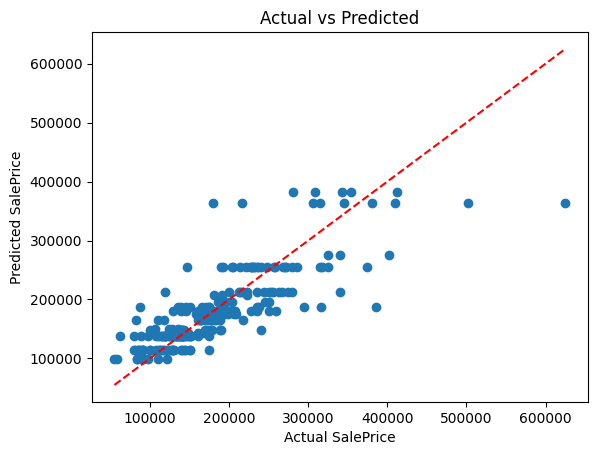

In [62]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [64]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

              Feature  Importance
0           GrLivArea    0.502263
1         TotalBsmtSF    0.316091
7    Foundation_PConc    0.067813
3            2ndFlrSF    0.041905
13    BsmtExposure_No    0.026836
4          BsmtFinSF1    0.022827
23       CentralAir_Y    0.016996
2            1stFlrSF    0.003703
5          BsmtFinSF2    0.001509
6   Foundation_CBlock    0.000056
10    Foundation_Wood    0.000000
8     Foundation_Slab    0.000000
11    BsmtExposure_Gd    0.000000
12    BsmtExposure_Mn    0.000000
14       Heating_GasA    0.000000
9    Foundation_Stone    0.000000
15       Heating_GasW    0.000000
16       Heating_Grav    0.000000
18       Heating_Wall    0.000000
17       Heating_OthW    0.000000
19       HeatingQC_Fa    0.000000
20       HeatingQC_Gd    0.000000
21       HeatingQC_Po    0.000000
22       HeatingQC_TA    0.000000


GrLivArea and TotalBsmtSF together explain ~82% of the model’s decision power.

Foundation type adds modest but interpretable structure — it likely splits older vs. newer construction.

CentralAir and HeatingQC contributed very little and could have been dropped.
